                                 Iris Flower Classification

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

In [2]:
# Load data
df = pd.read_csv('iris_extended.csv')
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


Data Preprocessing

In [3]:
# Check for missing values
print(df.isnull().sum())

species                            0
elevation                          0
soil_type                          0
sepal_length                       0
sepal_width                        0
petal_length                       0
petal_width                        0
sepal_area                         0
petal_area                         0
sepal_aspect_ratio                 0
petal_aspect_ratio                 0
sepal_to_petal_length_ratio        0
sepal_to_petal_width_ratio         0
sepal_petal_length_diff            0
sepal_petal_width_diff             0
petal_curvature_mm                 0
petal_texture_trichomes_per_mm2    0
leaf_area_cm2                      0
sepal_area_sqrt                    0
petal_area_sqrt                    0
area_ratios                        0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

In [6]:
df.describe()

,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,173.543917,5.895900,3.052858,3.807950,1.189542,17.870807,5.689068,2.003853,4.016732,1.996762,5.422667,2.08795,1.863317,8.355267,15.052733,60.144650,4.208441,2.106480,15.755674
std,72.461258,0.845579,0.527120,1.765469,0.728882,3.388978,4.585312,0.507508,2.070668,1.035622,5.921786,1.27443,1.004847,3.172975,4.663109,10.224305,0.399956,1.119309,21.891577
min,50.100000,4.040000,1.700000,0.960000,0.050000,9.048000,0.086000,0.978774,1.587379,0.745902,0.841121,-1.55000,-0.340000,3.310000,3.830000,35.160000,3.007989,0.293258,0.818662
25%,110.875000,5.210000,2.690000,1.640000,0.360000,15.554550,0.565825,1.639104,2.855016,1.223277,1.650452,1.14000,1.090000,5.310000,11.280000,52.302500,3.943926,0.752213,2.005655
50%,171.300000,5.840000,3.030000,4.300000,1.290000,17.646400,5.525400,1.970738,3.448642,1.442773,2.170656,1.95500,1.590000,7.925000,15.020000,59.170000,4.200762,2.350617,3.059424
75%,239.125000,6.520000,3.390000,5.200000,1.740000,20.007275,9.256725,2.293932,4.486058,3.059940,9.251453,3.29000,2.740000,10.715000,18.527500,67.305000,4.472949,3.042487,30.764892
max,299.900000,9.120000,4.760000,7.840000,2.990000,29.722600,23.128000,4.082902,34.400000,5.410000,55.800000,4.66000,4.560000,17.890000,29.850000,86.930000,5.451844,4.809158,183.620930


In [7]:
# Encode categorical soil_type
df['soil_type'] = LabelEncoder().fit_transform(df['soil_type'])


In [8]:
# Encode target variable species
le_species = LabelEncoder()
df['species'] = le_species.fit_transform(df['species'])


In [9]:
print(df[['soil_type', 'species']].head(10))  # Show first 10 rows of encoded columns

   soil_type  species
0          2        0
1          0        0
2          2        0
3          0        0
4          1        0
5          0        0
6          0        0
7          1        0
8          0        0
9          2        0


Exploratory Data Analysis (EDA)

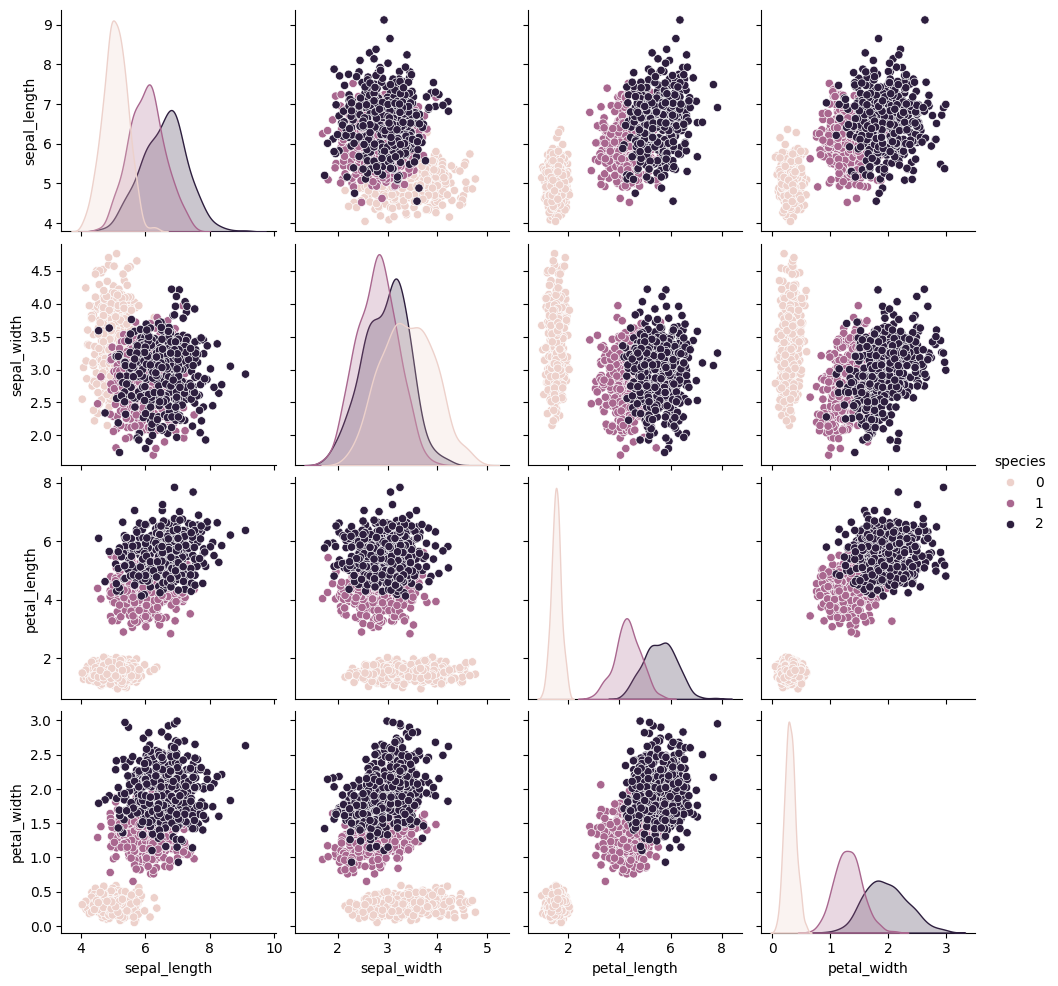

In [10]:
# Pairplot for main features and species
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='species')
plt.show()

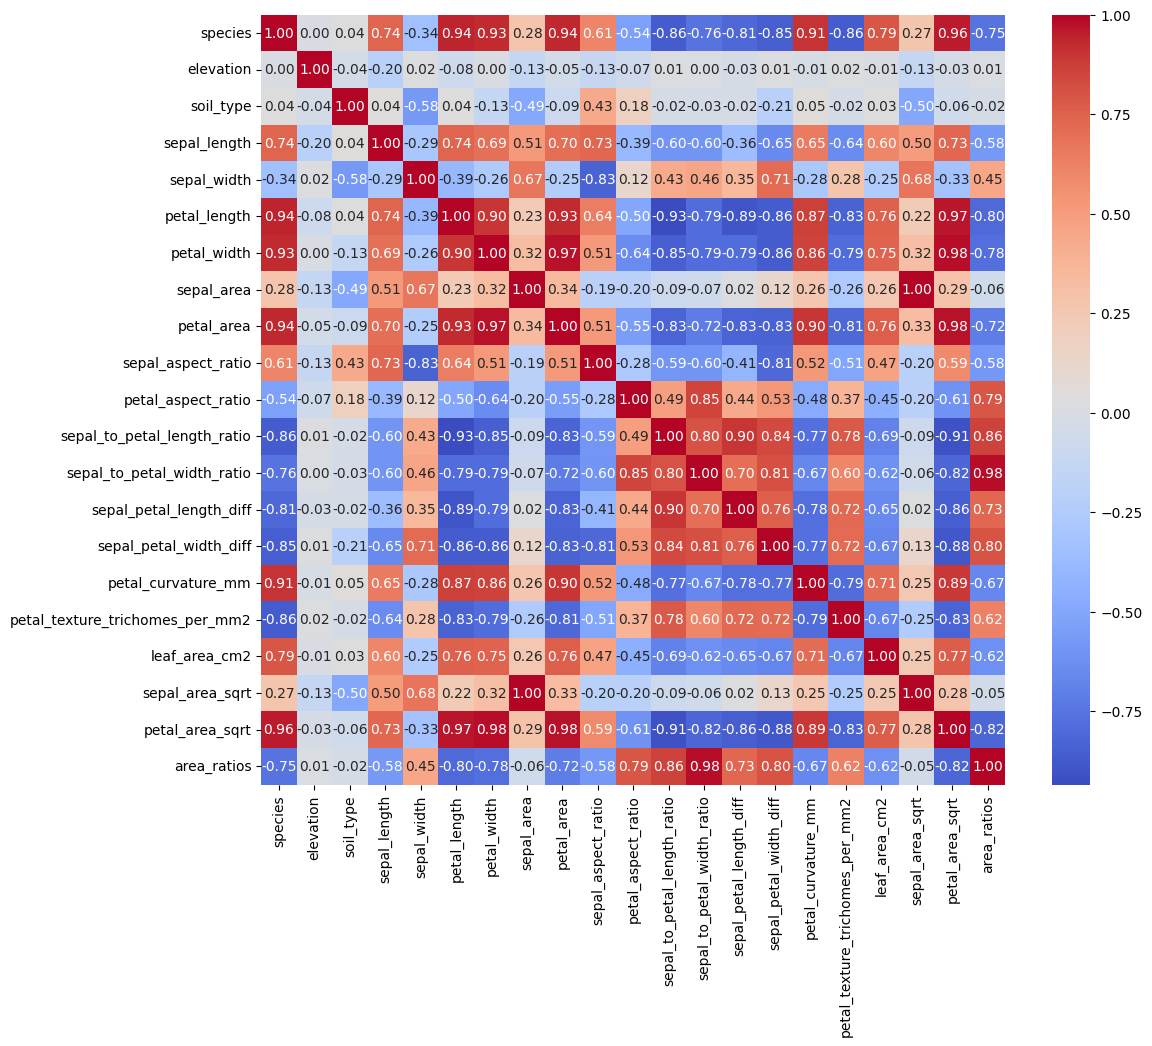

In [11]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Feature Engineering

In [12]:
# Already many derived features present in dataset (e.g., sepal_area, petal_area etc.)
# Scale numeric features for modeling
features = df.drop('species', axis=1)
target = df['species']

In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
# Checkin scaled features
print(features_scaled[:5])  # Print first 5 rows of scaled features


[[-0.16213924  1.3258513  -0.87065368  0.67781581 -1.22848598 -1.27582903
  -0.08124048 -1.14820137 -0.96719939  1.10684863  1.11050063  1.29959508
   1.12414768  1.28101013 -0.95384562  0.70310017 -0.67853425 -0.03434344
  -1.29909887  1.16576526]
 [ 1.62714842 -1.1389381  -0.49205716  1.89246579 -1.29081835 -1.12485011
   1.27619464 -1.11772183 -1.28281372  0.05720508  1.53105881  0.93309366
   1.4616942   1.80867327 -0.77412857  1.15792198 -0.74507017  1.25718811
  -1.21025432  1.07160804]
 [-0.40374829  1.3258513  -0.94164052 -0.47989745 -1.32481782 -1.11112476
  -1.05999654 -1.11935817 -0.35960194 -0.07165446  1.42256518  0.32871245
   1.21049679  0.55422882 -0.8497989   2.05254791 -0.96816118 -1.07444812
  -1.21472385  0.44822376]
 [-0.81379338 -1.1389381  -1.48587302  0.73475253 -1.29081835 -1.39935723
  -0.56359282 -1.18448447 -1.29118991  2.40760308  1.00070275  2.50242097
   0.80230099  1.40048103 -1.21238594  1.68568692 -0.90945302 -0.5333915
  -1.42690337  2.08438655]
 [-0.

Feature Selection

In [15]:
# Using Random Forest feature importance
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(features_scaled, target)
importances = rfc.feature_importances_

In [16]:
# Select important features (threshold here is mean importance)
sfm = SelectFromModel(rfc, threshold='mean')
sfm.fit(features_scaled, target)
selected_features = features.columns[sfm.get_support()]

In [17]:
print("Selected features based on importance:")
print(selected_features)

Selected features based on importance:
Index(['petal_length', 'petal_width', 'petal_area',
       'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio',
       'petal_curvature_mm', 'petal_texture_trichomes_per_mm2',
       'petal_area_sqrt', 'area_ratios'],
      dtype='object')


In [18]:
# Prepare final features
features_selected = sfm.transform(features_scaled)

Model Fitting

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features_selected, target, test_size=0.2, random_state=42)

rfc_final = RandomForestClassifier(random_state=42)
rfc_final.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluation

In [21]:
y_pred = rfc_final.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9958333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      0.99      0.99        73
           2       0.99      1.00      0.99        80

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix:
 [[87  0  0]
 [ 0 72  1]
 [ 0  0 80]]


In [22]:
# Save scaler and model for deployment
import joblib
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(sfm, 'feature_selector.joblib')
joblib.dump(rfc_final, 'model.joblib')
joblib.dump(le_species, 'label_encoder.joblib')

['label_encoder.joblib']